In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [3]:
# Load Data Mapping
proj_dir = '/home/jetcalz07/state_farm_distracted_driver/'
train_data = proj_dir+'data/imgs/train/'
drivers = pd.read_csv(proj_dir + 'data/driver_imgs_list.csv')
drivers.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

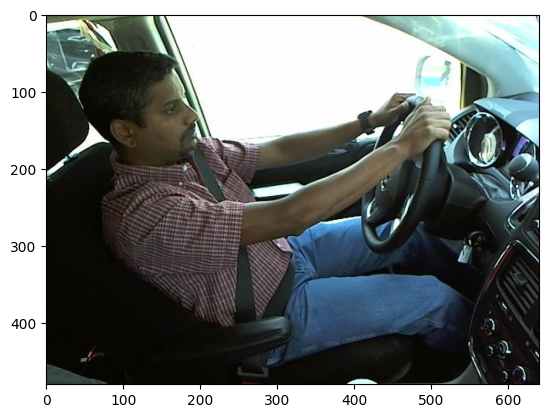

In [4]:
# Load sample images
sample_img = plt.imread(proj_dir + 'data/imgs/train/c0/img_34.jpg')
plt.imshow(sample_img)

c0: focus


<Figure size 640x480 with 0 Axes>

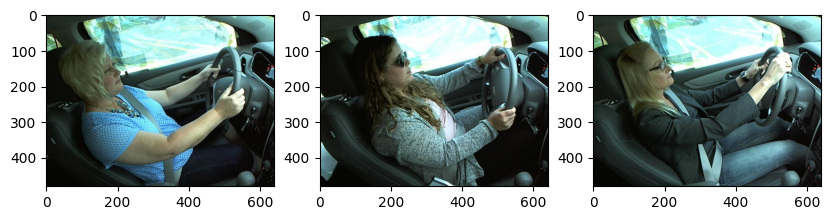

c1: text_r


<Figure size 640x480 with 0 Axes>

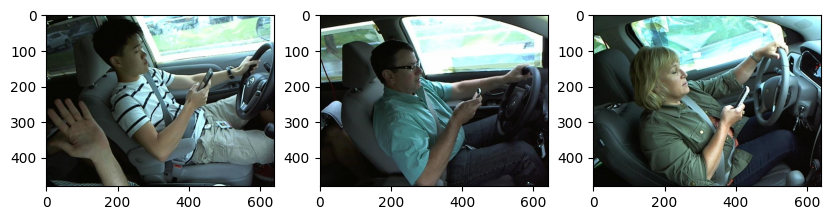

c2: call_r


<Figure size 640x480 with 0 Axes>

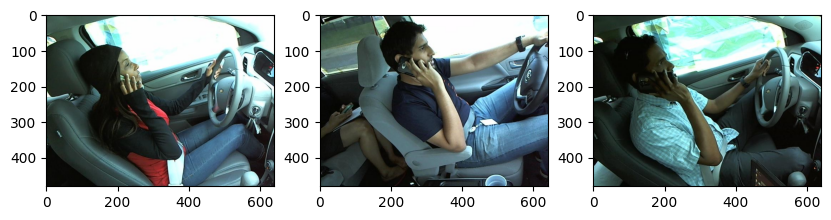

c3: text_l


<Figure size 640x480 with 0 Axes>

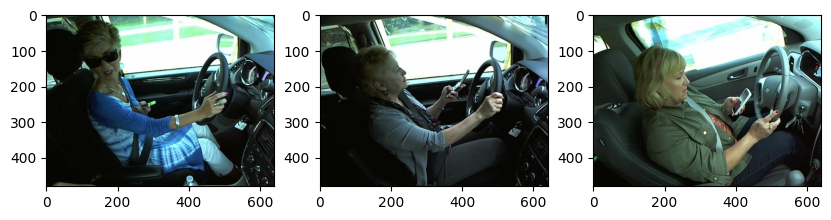

c4: call_l


<Figure size 640x480 with 0 Axes>

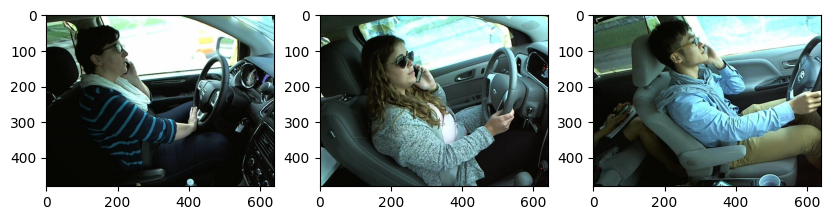

c5: reach_fwd


<Figure size 640x480 with 0 Axes>

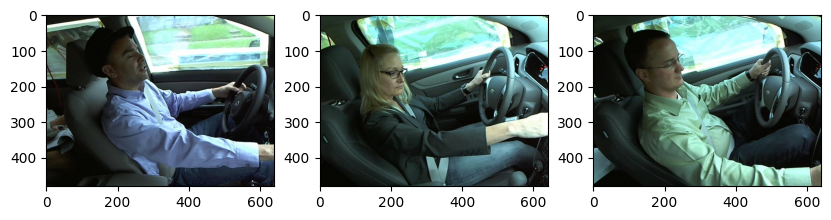

c6: drink


<Figure size 640x480 with 0 Axes>

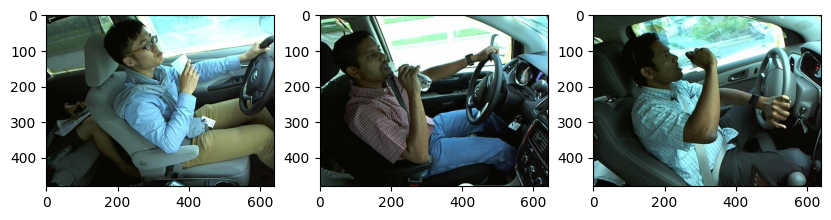

c7: reach_bck


<Figure size 640x480 with 0 Axes>

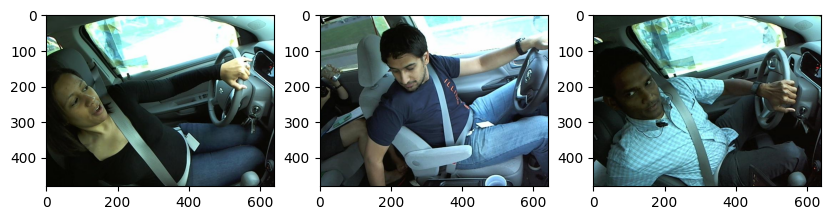

c8: touch_face


<Figure size 640x480 with 0 Axes>

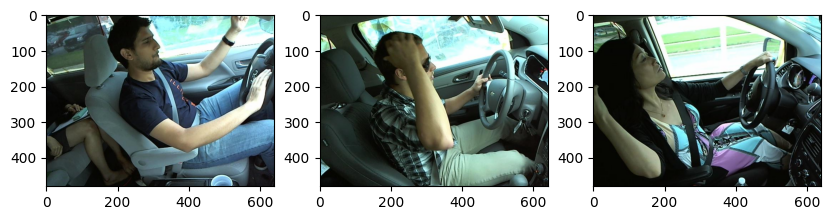

c9: look_away


<Figure size 640x480 with 0 Axes>

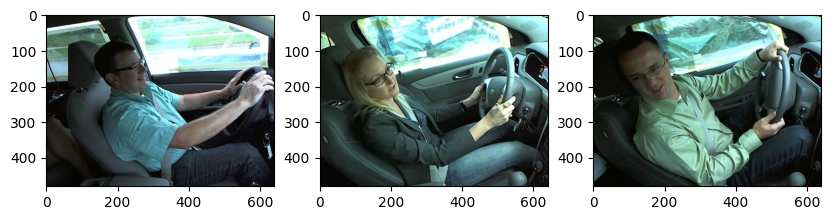

In [5]:
# Plot 3 images per class
classes = ['c' + str(x) for x in range(10)]
labels = ['focus', 'text_r', 'call_r', 'text_l', 'call_l', 'reach_fwd', 
          'drink', 'reach_bck', 'touch_face', 'look_away']

for i in range(10):
    img_class = classes[i]
    label = labels[i]
    print(f"{img_class}: {label}")
    
    class_dir = f'{train_data}{img_class}/'
    
    plt.figure()
    f, ax = plt.subplots(1, 3, figsize=(10, 10)) 
    ax[0].imshow(plt.imread(class_dir + os.listdir(class_dir)[0]))
    ax[1].imshow(plt.imread(class_dir + os.listdir(class_dir)[1]))
    ax[2].imshow(plt.imread(class_dir + os.listdir(class_dir)[2]))
    plt.show()


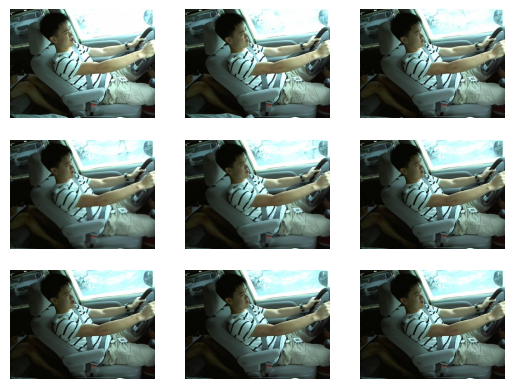

In [6]:
# Check batch for single driver
driver1 = drivers.loc[drivers['subject']=='p002', ]

for i in range(9):
    im_path = driver1.loc[i, 'img']
    label = driver1.loc[i, 'classname']
    img = plt.imread(f"{train_data}{label}/{im_path}")
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [9]:
## Create driver batchs
driver_imgs = {}
for i, row in drivers.iterrows():
    driver = row['subject']
    img_path = row['img']
    if not driver_imgs.get(driver, False):
        driver_imgs[driver] = [img_path]
    else:
        driver_imgs[driver].append(img_path)

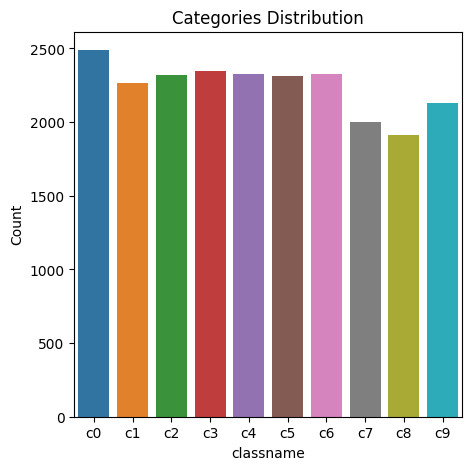

In [10]:
# Plot distribution of labels in train
plt.figure(figsize = (5,5))
sns.countplot(x = 'classname', data = drivers)
plt.ylabel('Count')
plt.title('Categories Distribution')
plt.show()

### Examine Test Examples

In [30]:
test_dir = '/home/jetcalz07/state_farm_distracted_driver/data/imgs/test/'

# Function to read indiv image
def get_cv2_image(path, img_rows, img_cols, color_type=1):
    # Loading as Grayscale image
    if color_type == 1:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    elif color_type == 3:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Reduce size
    img = cv2.resize(img, (img_rows, img_cols)) 
    return img

def load_test(img_rows, img_cols, color_type=1, size=200000):
    test_data = []
    test_files = []
    
    files = glob(os.path.join(test_dir, '*.jpg'))
    total = 0
    for file in tqdm(files):
        if total >= size:
            break
        img = get_cv2_image(file, img_rows, img_cols, color_type)
        test_data.append(img)
        test_files.append(file)
        total += 1
            
    return test_data, test_files

In [31]:
nb_load_test = 2000
test_data, test_files = load_test(128, 128, color_type=3, size=nb_load_test)

  3%|▉                                    | 2000/79726 [00:13<08:58, 144.32it/s]


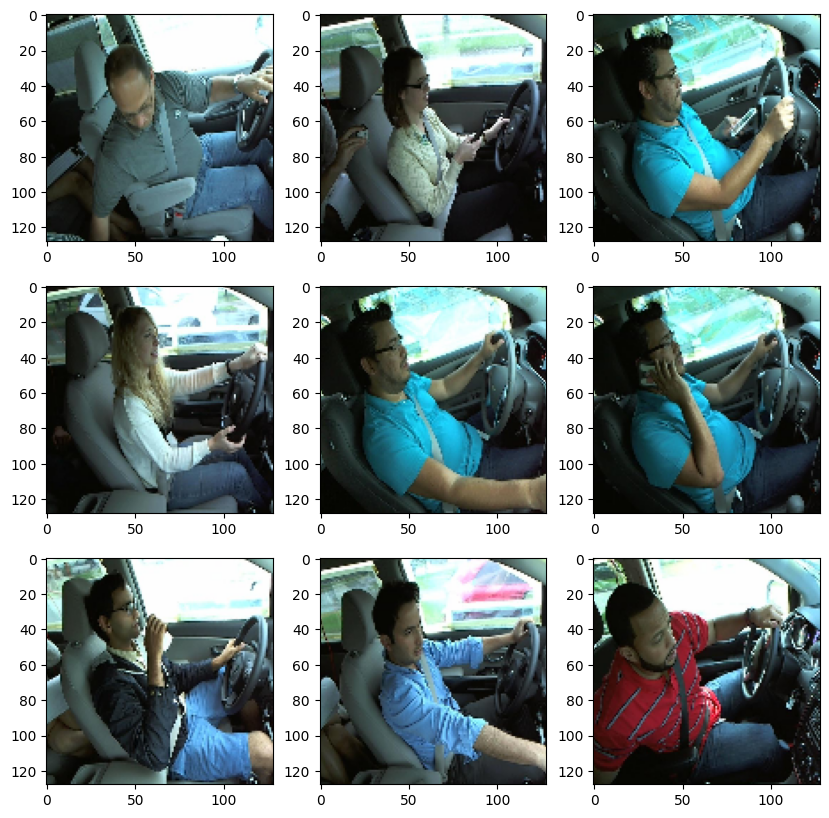

In [32]:
# print random test batch
fig, ax = plt.subplots(3, 3, figsize=(10,10))

for i in range(9):
    y = i % 3
    x = i//3
    rand_img = np.random.choice(nb_load_test, 1)[0]
    img = test_data[rand_img]
    ax[x, y].imshow(img)
    #plt.axis('off')
plt.show()

## Histogram Equalization (Improve Contrast)

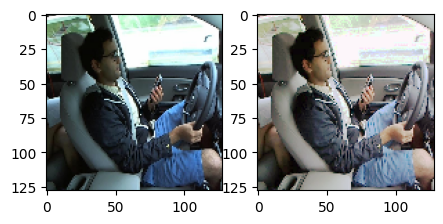

In [34]:
src = test_data[0]

#src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#dst = cv2.equalizeHist(src)

# For ease of understanding, we explicitly equalize each channel individually
colorimage_b = cv2.equalizeHist(src[:,:,0])
colorimage_g = cv2.equalizeHist(src[:,:,1])
colorimage_r = cv2.equalizeHist(src[:,:,2])
 
# Next we stack our equalized channels back into a single image
dst = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)

fig, ax = plt.subplots(1, 2, figsize=(5,10))
ax[0].imshow(src)
ax[1].imshow(dst)
plt.show()